In [1]:
# OPTIONAL, add your own dataset.
import torch
import numpy as np
from instanseg.utils.utils import show_images
import fastremap
import os
from skimage import io

def read_label(file_path):
    with open(file_path, 'rb') as f:
        label = np.load(f)[..., 0]
    return label

def load_custom_dataset(img_paths, label_paths):

    items = []

    for img_path, label_path in zip(img_paths, label_paths):

        image = io.imread(img_path)
        masks = read_label(label_path)
        masks, _ = fastremap.renumber(masks, in_place=True)
        masks = fastremap.refit(masks)
        assert masks.squeeze().ndim == 2, r"The mask should be a 2D array, found {}".format(masks.shape)
        item = {}
        item['nucleus_masks'] = masks # The masks should be a numpy array (or pytorch tensor) with shape (H, W). The values should be integers starting from 0. Each integer represents a different object.
        # item["cell_masks"] = cell_masks # Optional

        item['image'] = image # The image should be a numpy array (or pytorch tensor) with shape (H, W, C) or shape (C, H, W). Where C is the number of channels. C must be smaller than H and W
        
        item["parent_dataset"] = "EZ-20251002" #Important, this is the handle to call the dataset when training. 
        item['licence'] = "None" #optional but recommended for sharing.


        # Pixel size should be in microns per pixel (usually it is in the range 0.2 to 1). 
        # If the segmentation task is not for cells, or the pixel size is not known, you can comment this line out. 
        # However, we strongly recommend you make sure the labels are of reasonable size, and fairly uniform across the dataset.
        # A good label area is around 300 pixels. See load_Cellpose in data_download.py for an example of how to load a dataset without pixel size.
        # item['pixel_size'] = 0.25  
        item['image_modality'] = "Fluorescence" # Fluorescence or Brightfield, only used for padding.
        item['file_name'] = img_path #optional
        items.append(item)

    assert len(items) > 0, "No items found in the dataset folder."

    return items

In [2]:
save_path = '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/ez20251002_dataset.pth'

In [3]:
train_img_paths = [
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Yellow_SC2501-0101.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Craked_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Craked_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Yellow_SC2501-0101.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Craked_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Craked_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Yellow_SC2501-0101.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Craked_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Craked_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_20250806_0001.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Long-Grain Rice (Basmati)_longshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Long-Grain Rice (Basmati)_longshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Long-Grain Rice (Basmati)_longshape_SC3097_20250117_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Brown Rice)_Mediumshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Brown Rice)_Mediumshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Brown Rice)_Mediumshape_SC3097_20250117_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Red Jasmine Rice)_Mediumshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Red Jasmine Rice)_Mediumshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Red Jasmine Rice)_Mediumshape_SC3097_20250117_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Riceberry)_Mediumshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Riceberry)_Mediumshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Medium-Grain Rice (Riceberry)_Mediumshape_SC3097_20250117_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Japonica)_shortshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Japonica)_shortshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Japonica)_shortshape_SC3097_20250117_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Ponni Boiled Rice)_shortshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Ponni Boiled Rice)_shortshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Ponni Boiled Rice)_shortshape_SC3097_20250117_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Sona Masuri)_shortshape_SC3097_20250117_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Sona Masuri)_shortshape_SC3097_20250117_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250212/Images/hovernet_dataset_Short-Grain Rice (Sona Masuri)_shortshape_SC3097_20250117_0003.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/Defect_Grain_Segmentation_ParboiledRice_Whole_ Black_SC3131_20241212_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/Defect_Grain_Segmentation_ParboiledRice_Whole_ Damaged_SC3131_20241212_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/Defect_Grain_Segmentation_ParboiledRice_Whole_ PartlyBlack_SC313_20241212_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/Defect_Grain_Segmentation_ParboiledRice_Whole_ Peck_SC3131_20241212_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/Defect_Grain_Segmentation_ParboiledRice_Whole_ Undermilled_SC3131_20241212_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/Defect_Grain_Segmentation_ParboiledRice_Whole_ Yellow_SC3131_20241212_0001.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20190927_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20190927_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20190927_0003.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20190929_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20190929_0002.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20191002_0001.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20191003_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20191003_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20191003_0003.png',


    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0002.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0003.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0006.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0007.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0008.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0011.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200722_0012.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200726_0004.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200726_0005.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200726_0009.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200726_0010.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200726_0014.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20200815_0021.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20210818_0006_BROKEN_WHITE_C1.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20210818_0007_BROKEN_WHITE_C1.png',

    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20211004_0001_BROKEN_C1.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20211004_0002_BROKEN_C1.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/train/Images/IMG_20211004_0003_BROKEN_C1.png',
]

In [4]:
train_label_paths = [p.replace('/Images/', '/Labels/').replace('.png', '.npy').replace('.jpg', '.npy') for p in train_img_paths]

In [5]:
val_img_paths = [
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_ParboiledRice_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Immature_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_PartlyBlack_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Peck_SC2501-010_20250806_0001.png',
    '/home/easyricedev0/workspace/grain-segmentation/data/hover-dataset-20250902/Images/M0_ParboiledRice_BlueBG_Command_Undermilled_SC2501-010_20250806_0001.png',
]

In [6]:
val_label_paths = [p.replace('/Images/', '/Labels/').replace('.png', '.npy').replace('.jpg', '.npy') for p in val_img_paths]

In [7]:
test_img_paths = ['/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Black_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Cracked_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Cracked_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Damaged_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Glutinous_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Glutinous_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Immature_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Immature_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Paddy_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_ParboiledRice_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_ParboiledRice_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_PartlyBlack_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_PartlyBlack_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Peck_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Peck_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Undermilled_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Undermilled_SC2501-010_16092025_002.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Yellow_SC2501-010_16092025_001.png',
 '/home/easyricedev0/NAS/M0/Segment_M0_ParboiledRice_WhiteRice_BlueBG/hover-dataset-20250925/Images/M0_ParboiledRice_BlueBG_Command_Yellow_SC2501-010_16092025_002.png',
 ]

In [8]:
test_label_paths = [p.replace('/Images/', '/Labels/').replace('.png', '.npy').replace('.jpg', '.npy') for p in test_img_paths]

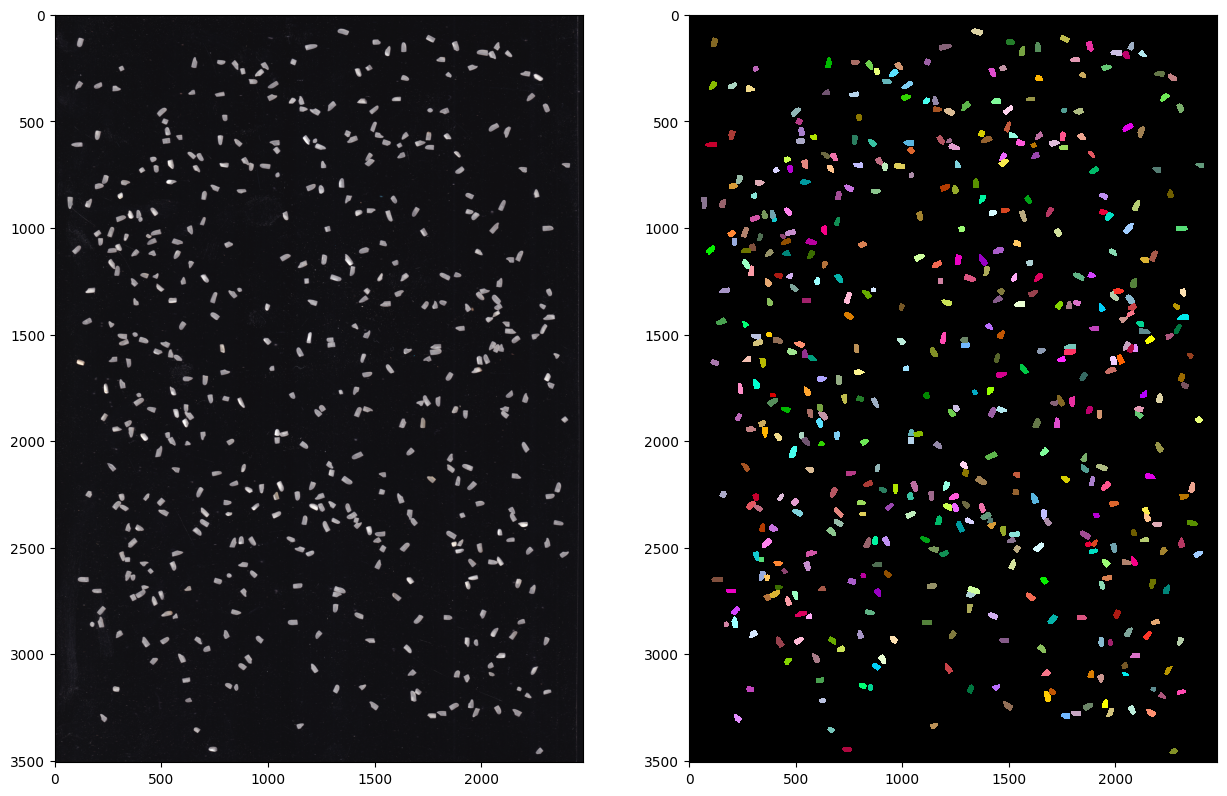

In [9]:
Segmentation_Dataset = {}
Segmentation_Dataset['Train'] = load_custom_dataset(train_img_paths, train_label_paths)
Segmentation_Dataset['Validation'] = load_custom_dataset(val_img_paths, val_label_paths)
Segmentation_Dataset['Test'] = load_custom_dataset(test_img_paths, test_label_paths)

item = Segmentation_Dataset['Train'][-1]

show_images(item['image'],item['nucleus_masks'],colorbar = False,labels = [1], axes = True)

In [10]:
torch.save(Segmentation_Dataset, save_path) # You can change the name to whatever you want, but make sure it ends with "_dataset.pth".
